<a href="https://colab.research.google.com/github/dys0602/Colab/blob/main/Ch2_2_%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%A0%84%EC%B2%98%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

**넘파이로 데이터 준비하기**

In [2]:
import numpy as np

In [4]:
fish_data = np.column_stack((fish_length, fish_weight)) #column_stack() : 전달받은 리스트를 일렬로 세운 다음 차례대로 나란히 연결, 연결할 리스트는 파이썬 튜플로 전달

In [6]:
print(fish_data[:5]) #0~4번째 인덱스 데이터 print

[[ 25.4 242. ]
 [ 26.3 290. ]
 [ 26.5 340. ]
 [ 29.  363. ]
 [ 29.  430. ]]


In [8]:
fish_target = np.concatenate((np.ones(35), np.zeros(14))) #np.concatenate() : 첫 번째 차원을 따라 배열을 연결하는 함수
#np.ones()와 np.zeros()는 원하는 개수의 1과 0을 채운 배열 만들기

In [9]:
print(fish_target)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


**사이킷런으로 훈련 세트와 테스트 세트 나누기**

In [11]:
from sklearn.model_selection import train_test_split #train_test_split() : 전달되는 리스트나 배열을 비율에 맞게 훈련 세트와 테스트 세트로 섞어서 나눠줌

In [13]:
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, random_state=42)

In [14]:
print(train_input.shape, test_input.shape) #2차원 배열

(36, 2) (13, 2)


In [15]:
print(train_target.shape, test_target.shape) #1차원 배열

(36,) (13,)


In [16]:
#도미와 빙어가 잘 섞였는지 테스트 데이터 출력
print(test_target) #원래 데이터 비율은 35:14=2.5:1인데, 테스트 비율은 3.3:1로 샘플링 편향 조금 나타남

[1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [17]:
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, stratify=fish_target, random_state=42)
#훈련 세트와 테스트 세트에 샘플의 클래스 비율이 일정하게 하기 위해 stratify 매개변수에 타깃 데이터 전달해서 클래스 비율에 맞게 데이터 나누기

In [19]:
print(test_target) #테스트 비율이 2.25:1로 전체 훈련 데이터 비율과 비슷한 비율이 됨

[0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.]


**수상한 도미 한 마리**

In [20]:
#k-최근접 이웃 훈련
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

In [21]:
print(kn.predict([[25, 150]])) #새로운 도미 데이터 넣고 결과 확인 -> 빙어로 예측

[0.]


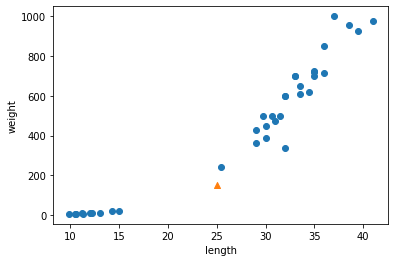

In [22]:
import matplotlib.pyplot as plt
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^') #marker 매개변수는 모양 지정
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [23]:
distances, indexes = kn.kneighbors([[25,150]])

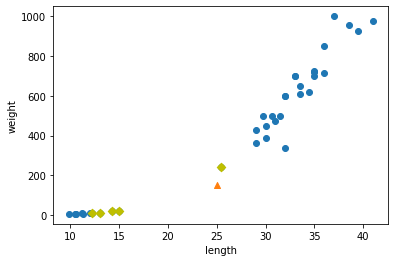

In [28]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^') #marker 매개변수는 모양 지정
plt.scatter(train_input[indexes,0], train_input[indexes,1], marker='D',c='y') #D = 마름모, 삼각형 샘플에 가장 가까운 5개의 샘플을 노란색 마름모로 표시
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [31]:
print(train_input[indexes])
print(train_target[indexes]) #삼각형 샘플에 가까운 이웃은 빙어 4, 도미 1

[[[ 25.4 242. ]
  [ 15.   19.9]
  [ 14.3  19.7]
  [ 13.   12.2]
  [ 12.2  12.2]]]
[[1. 0. 0. 0. 0.]]


In [32]:
print(distances) #해당 샘플과 이웃 샘플까지의 거리

[[ 92.00086956 130.48375378 130.73859415 138.32150953 138.39320793]]


**기준을 맞춰라**

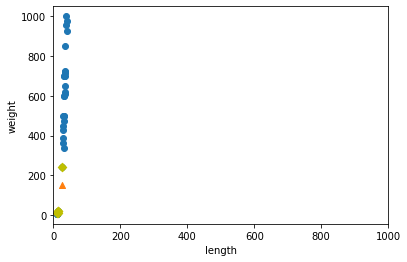

In [33]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^') #marker 매개변수는 모양 지정
plt.scatter(train_input[indexes,0], train_input[indexes,1], marker='D',c='y') #D = 마름모, 삼각형 샘플에 가장 가까운 5개의 샘플을 노란색 마름모로 표시
plt.xlim((0,1000))
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

-> x,t축 범위를 동일하게 하면 산점도가 거의 일직선

-> 오로지 생선의 무게(y축)만 고려 대상

-> 두 특성(길이와 무게)의 값이 놓인 범위가 매우 다름 = 두 특성의 **스케일**이 다름

: 샘플 간의 거리에 영향을 많이 받으므로 제대로 사용하려면 특성값을 일정한 기준에 맞춰 주어야 한다 = **"데이터 전처리"**

###**데이터 전처리 방법**
**표준점수(standard score, 혹은 z점수)**
- 훈련 세트의 스케일을 바꾸는 대표적인 방법 중 하나. 표준점수 = (특성-평균)/표준편차
-  각 특성값이 0에서 표준편차의 몇 배만큼 떨어져 있는지 나타내고, 이를 통해 실제 특성값의 크기와 상관없이 동일한 조건으로 비교 가능
- 반드시 훈련세트의 평균과 표준편차로 테스트 세트를 바꿔야 함

**브로드캐스팅**
- 크기가 다른 넘파이 배열에서 자동으로 사칙연산을 모든 행이나 열로 확장하여 수행하는 기능 

In [35]:
mean = np.mean(train_input, axis=0) #평균 계산
std = np.std(train_input, axis=0) #표준편차 계산
#특성마다 값의 스케일이 다르므로 평균가 표준편차는 각 특성별로 계산해야 함 -> axis=0 지정
#axis=0 : 행을 따라 각 열의 통계값 계산 / axis=1 : 열을 따라 각 행의 통계값 계산(?)

In [36]:
print(mean, std)

[ 27.29722222 454.09722222] [  9.98244253 323.29893931]


In [37]:
train_scaled = (train_input-mean)/std 
#train_input의 모든 행에서 mean에 있는 두 평균 값을 빼주고 std로 나눠 모든 행에 적용 : 브로드캐스팅 (넘파이 기능)

**전처리 데이터로 모델 훈련하기**

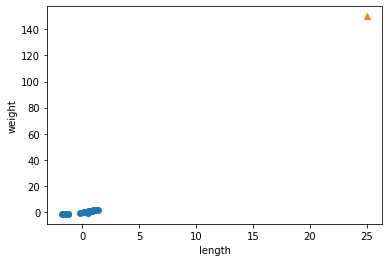

In [39]:
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(25, 150, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()
#샘플도 동일한 비율로 변환해야 함

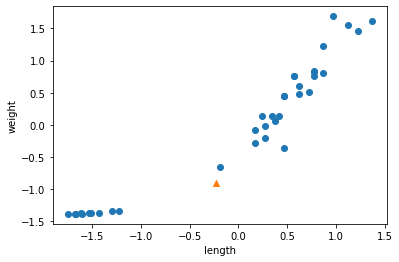

In [40]:
new = ([25,160]- mean)/std
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()
#xlim와 ylim이 -1.5~1.5 사이로 바뀜

In [42]:
#테스트 세트의 스케일도 변환해야 함
test_scaled = (test_input-mean)/std
kn.score(test_scaled, test_target)

1.0

In [43]:
print(kn.predict([new])) #새로운 샘플을 예측한 결과, 도미로 예측

[1.]


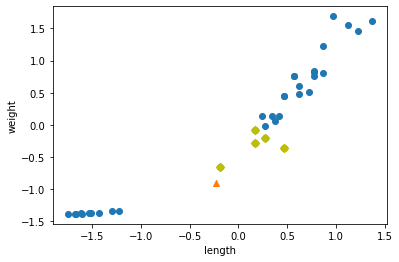

In [45]:
distances, indexes = kn.kneighbors([new])
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker='^')
plt.scatter(train_scaled[indexes,0], train_scaled[indexes, 1], marker='D', c='y')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()
#샘플 데이터와 가까운 샘플 모두 도미 -> 도미로 예측하는 것이 당연
#특성값의 스케일에 민감하지 않고 안정적인 예측을 할 수 있는 모델을 만들었음